<h1 align="center"> HW 11: Data Competition</h1>
<h2 align="center"> Hyperparamter Tuning and Modeling </h2>
<h2 align="center"> Ankit Agarwal, Estelle Lu </h2>
<h3 align="center"> IST 5520: Data Science and Machine Learning with Python </h3>


In [92]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [48]:
#Import in the training data
dat1 = pd.read_csv("train_data.csv")
dat1.head(10)

,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,accept
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
1,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,1,1,1,0,1,1
3,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,1,1,0,0,1,1
4,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,1,1,0,1,1
5,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,1,1,0,0,1,0
6,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,1,1,0,0,1,0
7,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
8,0,0,1,1,0,0,0,0,0,1,...,0,0,1,0,1,1,0,0,1,1
9,1,0,0,0,0,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [49]:
#Import the testing data
dat2 = pd.read_csv("test_data.csv")
dat2.head(10)

,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,accept
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
1,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
2,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,1,0,0,1,1
3,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,1,1,0,0,1,1
4,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,1,1,0,0,1,0
5,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,1
6,0,0,1,1,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,1,1
7,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,1,1,0,0,1,0
8,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
9,0,0,1,1,0,0,0,0,0,1,...,0,0,1,0,1,1,1,0,1,1


In [50]:
train_y = dat1['accept']
train_y.head()

0    0
1    0
2    1
3    1
4    1
Name: accept, dtype: int64

In [51]:
train_X=dat1.drop(['accept'],axis=1)
train_X

,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,0,1,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,1
1,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
2,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,1,1,1,0,1
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,1
4,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,1
3619,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
3620,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,1,1,0,1
3621,0,1,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


In [52]:
test_y = dat2['accept']
test_y

0       1
1       1
2       1
3       1
4       0
       ..
8451    1
8452    1
8453    1
8454    1
8455    1
Name: accept, Length: 8456, dtype: int64

In [53]:
test_X=dat2.drop(['accept'],axis=1)
test_X

,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
1,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
2,0,1,0,0,0,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,1
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8451,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
8452,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
8453,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,1
8454,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,1


### Data Preprocessing

In [54]:
train_x

,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,0,1,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,1
1,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
2,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,1,1,1,0,1
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,1
4,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,1
3619,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
3620,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,1,1,0,1
3621,0,1,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


In [55]:
# Transform training X
train_X_scale = scaler.transform(train_X)
train_X_scale = pd.DataFrame(train_X_scale)
train_X_scale.columns = train_X.columns

train_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
destination_Home,3623.0,0.252829,0.434694,0.0,0.0,0.0,1.0,1.0
destination_No Urgent Place,3623.0,0.496274,0.500055,0.0,0.0,0.0,1.0,1.0
destination_Work,3623.0,0.250897,0.433589,0.0,0.0,0.0,1.0,1.0
passenger_Alone,3623.0,0.584322,0.492906,0.0,0.0,1.0,1.0,1.0
passenger_Friend(s),3623.0,0.254485,0.435632,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
toCoupon_GEQ5min,3623.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
toCoupon_GEQ15min,3623.0,0.555893,0.496935,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,3623.0,0.117582,0.322157,0.0,0.0,0.0,0.0,1.0
direction_same,3623.0,0.211151,0.408182,0.0,0.0,0.0,0.0,1.0


In [56]:
# Tranform the x in the Test Dataset
# Transform test X
test_X_scale = scaler.transform(test_X)
test_X_scale = pd.DataFrame(test_X_scale)
test_X_scale.columns = test_X.columns

test_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
destination_Home,8456.0,0.256504,0.436729,0.0,0.0,0.0,1.0,1.0
destination_No Urgent Place,8456.0,0.493377,0.499986,0.0,0.0,0.0,1.0,1.0
destination_Work,8456.0,0.250118,0.433107,0.0,0.0,0.0,1.0,1.0
passenger_Alone,8456.0,0.573794,0.494554,0.0,0.0,1.0,1.0,1.0
passenger_Friend(s),8456.0,0.263245,0.440420,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
toCoupon_GEQ5min,8456.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
toCoupon_GEQ15min,8456.0,0.563505,0.495980,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,8456.0,0.120151,0.325158,0.0,0.0,0.0,0.0,1.0
direction_same,8456.0,0.216887,0.412150,0.0,0.0,0.0,0.0,1.0


### Random Forest for Feature Selection

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Train a RF classifier
rf = RandomForestClassifier(n_estimators=100, max_features=51, random_state=123)

<AxesSubplot:title={'center':'Feature Importance'}>

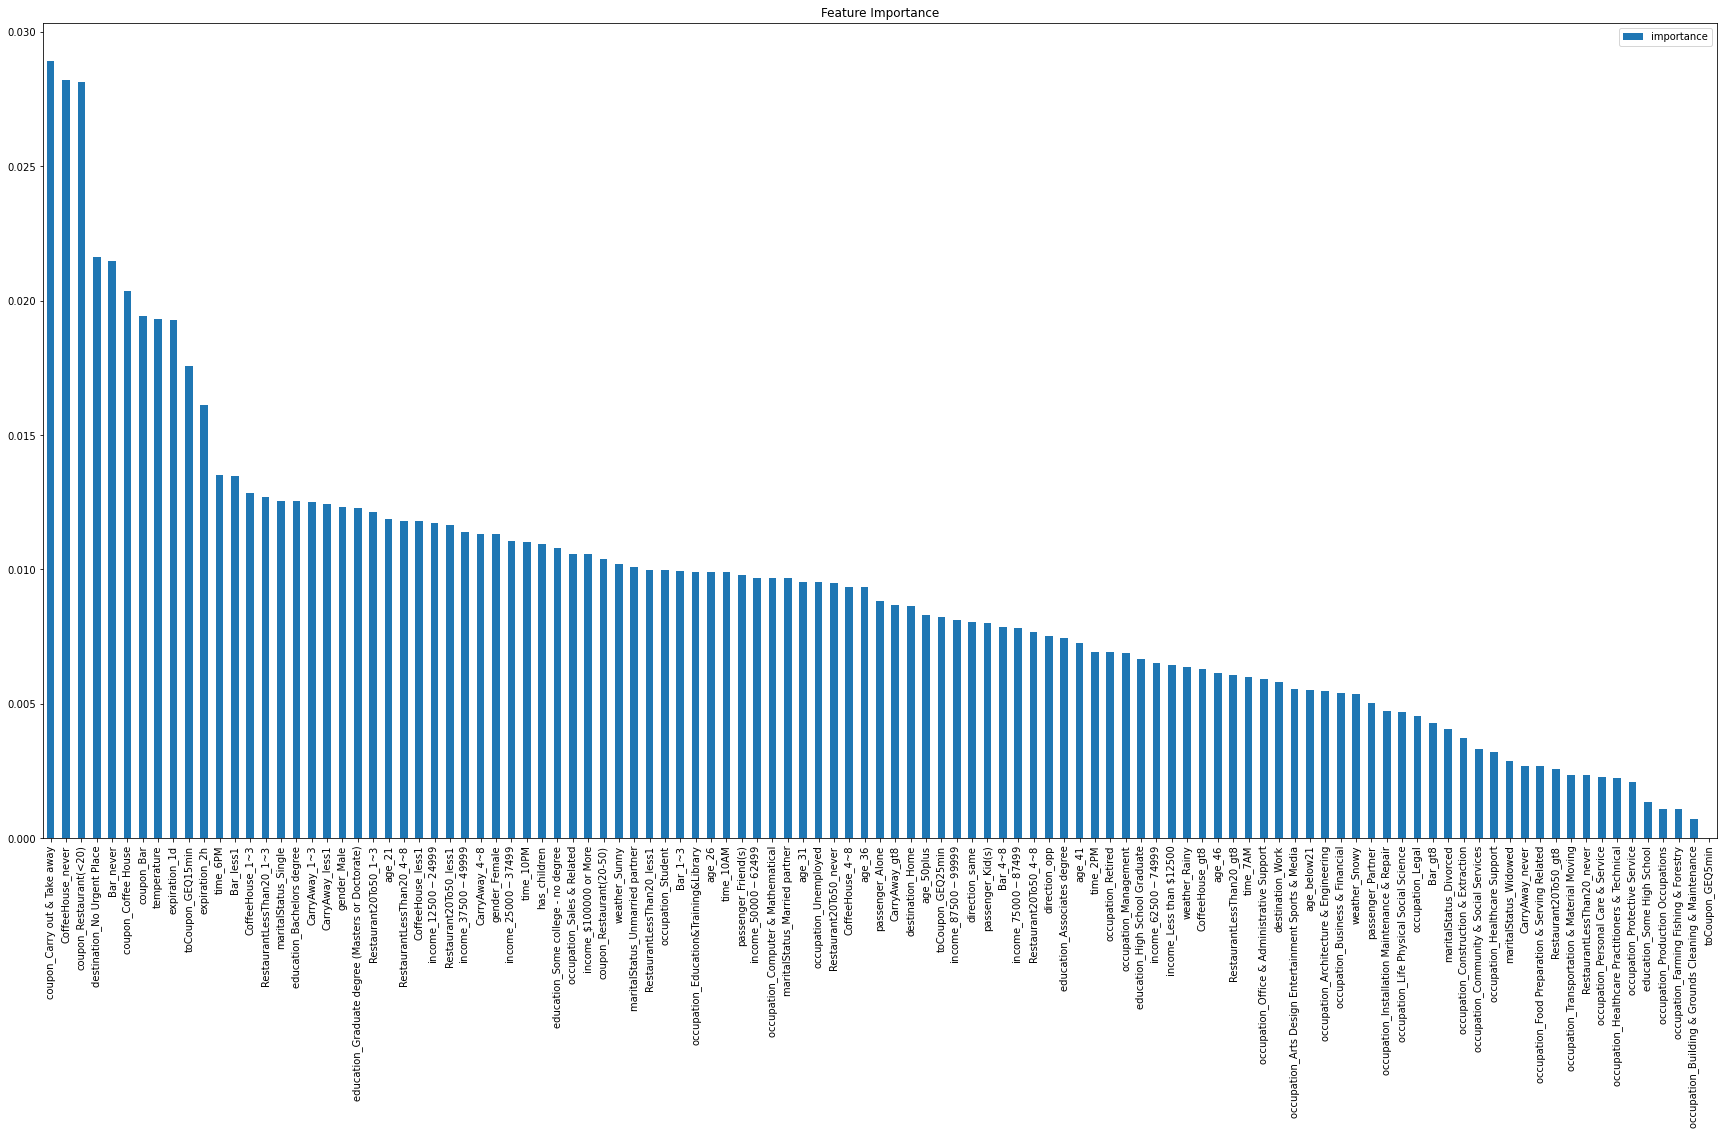

In [65]:
rf.fit(train_X_scale,train_y)
# Show feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_X_scale.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)
# sns.barplot(data = feature_importances, y = "importance")

feature_importances.plot(kind = 'bar',figsize=(30,15),title='Feature Importance')

#### Random Forest Prediction without Feature Selection

In [59]:
# Predict on test set
pred_y_rf = rf.predict(test_X_scale)

# Print confusion matrix
metrics.roc_auc_score(test_y, pred_y_rf)

0.7183040518604555

In [60]:
# Print confusion matrix
cm1 = metrics.confusion_matrix(test_y, pred_y_rf)
print(cm1)

[[2327 1315]
 [ 974 3840]]


#### Random Forest with Feature Selection (85 features)

In [84]:
# Select the 50 most importance features
train_xsi = train_X_scale[feature_importances.index[range(85)]]
train_xsi

,coupon_Carry out & Take away,CoffeeHouse_never,coupon_Restaurant(<20),destination_No Urgent Place,Bar_never,coupon_Coffee House,coupon_Bar,temperature,expiration_1d,toCoupon_GEQ15min,...,CoffeeHouse_gt8,age_46,RestaurantLessThan20_gt8,time_7AM,occupation_Office & Administrative Support,destination_Work,occupation_Arts Design Entertainment Sports & Media,age_below21,occupation_Architecture & Engineering,occupation_Business & Financial
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3619,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3620,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3621,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.5,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [85]:
test_xsi = test_X_scale[feature_importances.index[range(85)]]
test_xsi

,coupon_Carry out & Take away,CoffeeHouse_never,coupon_Restaurant(<20),destination_No Urgent Place,Bar_never,coupon_Coffee House,coupon_Bar,temperature,expiration_1d,toCoupon_GEQ15min,...,CoffeeHouse_gt8,age_46,RestaurantLessThan20_gt8,time_7AM,occupation_Office & Administrative Support,destination_Work,occupation_Arts Design Entertainment Sports & Media,age_below21,occupation_Architecture & Engineering,occupation_Business & Financial
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8451,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8452,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8453,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8454,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
frf = RandomForestClassifier(n_estimators=100, max_features=85, random_state=123)

In [87]:
frf.fit(train_xsi,train_y)
# Predict on test set
pred_y_frf = frf.predict(test_xsi)

# Print confusion matrix
metrics.roc_auc_score(test_y, pred_y_frf)

0.7208780015819685

In [61]:
rf2 = RandomForestClassifier()
parameters = {'criterion': ['gini', 'entropy','log_loss'],
              'n_estimators':[100,150,200,250,400,500],
              'max_features':[20,25,30,40,50,60,70,80,90,100],
              'random_state':[123]}
# Use a 10-fold cross-validation
from joblib import parallel_backend

with parallel_backend('threading', n_jobs=4):
    grid_rf = GridSearchCV(rf2, parameters, scoring='roc_auc', cv=10)
    grid_rf.fit(train_X_scale,train_y)

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ankit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ankit\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\ankit\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ankit\anaconda3\lib\site-package

In [63]:
grid_rf.best_params_

{'criterion': 'gini',
 'max_features': 50,
 'n_estimators': 400,
 'random_state': 123}

In [90]:
# Predict on test set
pred_y_rf_tuned = grid_rf.predict(test_X_scale)
print('AUC Results on the test set:',metrics.roc_auc_score(test_y,pred_y_rf_tuned))

AUC Results on the test set: 0.7230853767852186


In [66]:
# Print confusion matrix
cm2 = metrics.confusion_matrix(test_y, pred_y_rf_tuned)
print(cm2)

[[2324 1318]
 [ 924 3890]]


### K -Nearest Neighbors Classifier (with Hyperparameter tuning)

In [103]:
#Tune Hyperparameter
for k in range(10,40):
    k = k + 1
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, 
                                         weights='distance', 
                                         algorithm='auto')
    knn.fit(train_X_scale, train_y)
    pred_y_knn = knn.predict(test_X_scale)
    print("AUC score is ", metrics.roc_auc_score(test_y, pred_y_knn)*100,"% for k =",k)

AUC score is  65.92058742268968 % for k = 11
AUC score is  65.90315702393737 % for k = 12
AUC score is  66.28303248784493 % for k = 13
AUC score is  66.21546687802167 % for k = 14
AUC score is  66.29701216956676 % for k = 15
AUC score is  66.43131635785886 % for k = 16
AUC score is  66.67318595520526 % for k = 17
AUC score is  66.75807359415508 % for k = 18
AUC score is  67.11311530277219 % for k = 19
AUC score is  67.13758972719828 % for k = 20
AUC score is  67.2618668732762 % for k = 21
AUC score is  67.29852432510248 % for k = 22
AUC score is  67.42136414772308 % for k = 23
AUC score is  67.50326877013252 % for k = 24
AUC score is  67.89877797847072 % for k = 25
AUC score is  67.76925346104066 % for k = 26
AUC score is  67.88350356490439 % for k = 27
AUC score is  67.63196625620816 % for k = 28
AUC score is  67.4649572555974 % for k = 29
AUC score is  67.6163325117775 % for k = 30
AUC score is  67.65119330928212 % for k = 31
AUC score is  67.28386020363908 % for k = 32
AUC score is 

In [106]:
knn_final1 = neighbors.KNeighborsClassifier(n_neighbors = 30, 
                                      weights='distance',                                    
                                      algorithm='auto')
knn_final1.fit(train_X_scale, train_y)
pred_y_knn_final1 = knn_final1.predict(test_X_scale)
metrics.roc_auc_score(test_y,pred_y_knn_final1)

0.676163325117775

In [107]:
knn_final2 = neighbors.KNeighborsClassifier(n_neighbors = 31, 
                                      weights='distance',                                    
                                      algorithm='auto')
knn_final2.fit(train_X_scale, train_y)
pred_y_knn_final2 = knn_final2.predict(test_X_scale)
metrics.roc_auc_score(test_y,pred_y_knn_final2)

0.6765119330928212

### Naive Gaussian Classifier

In [112]:
# Gaussian Naive Bayes (GaussianNB) for classification. The likelihood of features is assumed to be Gaussian.
from sklearn import naive_bayes
gauss_nb = naive_bayes.GaussianNB()

In [113]:
gauss_nb.fit(train_X, train_y)

GaussianNB()

In [114]:
pred_y_gnb = gauss_nb.predict(test_X_scale)

In [115]:
# Print confusion matrix
metrics.roc_auc_score(test_y, pred_y_gnb)

0.6070732398434275

### Bernoulli Naive Bayes Classifier

In [118]:
# Naive Bayes classifier for multivariate Bernoulli models
bernou_nb = naive_bayes.BernoulliNB()

In [119]:
bernou_nb.fit(train_X, train_y)
pred_y_bnb = bernou_nb.predict(test_X)
# Print confusion matrix
metrics.roc_auc_score(test_y, pred_y_bnb)

0.6437830513099378

### Decision Tree Classifier


In [120]:
from sklearn import tree
# Decision trees for classification, use entropy criterion (gini by default)
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy')

In [122]:
pred_y_dt = dt.predict(test_X)
metrics.roc_auc_score(test_y, pred_y_dt)

0.6508504620082329

### Support Vector Machine

In [151]:
from sklearn import svm

In [152]:
# Train an SVC with linear kernel
svc_linear = svm.SVC(kernel='linear', C=1.0)

In [153]:
svc_linear.fit(train_X,train_y)

SVC(kernel='linear')

In [154]:
# Predict on test set
pred_y1 = svc_linear.predict(test_X)

In [155]:
# Count of the values in the test_y
test_y.value_counts()

1    4814
0    3642
Name: accept, dtype: int64

In [156]:
# Count of the values in the pred_y
pd.Series(pred_y1).value_counts()

1    5146
0    3310
dtype: int64

In [157]:
# Calculate classification accuracy
metrics.roc_auc_score(test_y, pred_y1)

0.6725152042584929

#### Tune Hyperparameters

In [159]:
parameters = {'kernel':['linear','rbf','poly'],
              'C':[0.001,0.005,0.01,0.025,0.05,1,5,10,100],
              'gamma':[0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5]}
parameters

{'kernel': ['linear', 'rbf', 'poly'],
 'C': [0.001, 0.005, 0.01, 0.025, 0.05, 1, 5, 10, 100],
 'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]}

In [160]:
svc = svm.SVC()

In [161]:
with parallel_backend('threading', n_jobs=4):
    grid_svc = GridSearchCV(svc, parameters, scoring='roc_auc', cv=5)
    grid_svc.fit(train_X_scale,train_y)


In [162]:
# Show best parameters
grid_svc.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [165]:
# Train a new SVC with best parameters
svc_final = svm.SVC(kernel='rbf', C=1.0, gamma=0.1)
svc_final.fit(train_X_scale,train_y)
pred_y_svct = svc_final.predict(test_X)
metrics.roc_auc_score(test_y, pred_y_svct)

0.5

### Artificial Neural Network

#### Using all features

In [194]:
from sklearn import neural_network
# Specify an ANN model, use 1 hidden layer with 20 nodes
ann1 = neural_network.MLPClassifier(alpha=1e-5,
                                   activation='relu',
                                   hidden_layer_sizes=(20),
                                   random_state=1)

In [195]:
ann1.fit(train_X_scale, train_y)

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=20, random_state=1)

In [196]:
pred_y_ann1 = ann1.predict(test_X_scale)

In [197]:
metrics.roc_auc_score(test_y, pred_y_ann1)

0.6984351654188189

#### Using select features

In [199]:
ann1.fit(train_xsi, train_y)

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=20, random_state=1)

In [200]:
pred_y_ann2 = ann1.predict(test_xsi)
metrics.roc_auc_score(test_y, pred_y_ann2)

0.6987668905469061

#### ANN using different structure (all features)

In [201]:
ann2 = neural_network.MLPClassifier(solver='lbfgs',
                                   activation='relu',
                                   alpha=1e-5,
                                   hidden_layer_sizes=(20, 15, 10),
                                   random_state=1)

In [202]:
ann2.fit(train_X_scale, train_y)

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 15, 10), random_state=1,
              solver='lbfgs')

In [203]:
pred_y_ann3 = ann2.predict(test_X_scale)

In [204]:
metrics.roc_auc_score(test_y, pred_y_ann3)

0.6676810634003376

#### ANN with different structure and using 85 features

In [205]:
ann2.fit(train_xsi, train_y)

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 15, 10), random_state=1,
              solver='lbfgs')

In [206]:
pred_y_ann4 = ann2.predict(test_xsi)
metrics.roc_auc_score(test_y, pred_y_ann4)

0.6624831998561763

#### ANN with hyperparameter tuning

In [207]:
ann3 = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(20,15,10),(20),(50,20)],
    'activation': ['relu','logistic'],
    'solver': ['adam','lbfgs'],
    'alpha': [0.0001,0.0005],
    'learning_rate': ['constant','adaptive'],
}


with parallel_backend('threading', n_jobs=4):
    
    from sklearn.model_selection import GridSearchCV
    clf = GridSearchCV(ann3, parameters,scoring='roc_auc', n_jobs=4, cv=5)
    clf.fit(train_X_scale, train_y) # X is train samples and y is the corresponding labels

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochas

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochas

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = 

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [208]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 20, 'learning_rate': 'constant', 'solver': 'adam'}


In [210]:
ann4 = neural_network.MLPClassifier(solver='adam',
                                   activation='relu',
                                   alpha=0.0001,
                                   hidden_layer_sizes=20,
                                   learning_rate = 'constant',
                                   random_state=1)

In [211]:
ann4.fit(train_X_scale, train_y)

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=20, random_state=1)

In [212]:
pred_y_ann4 = ann4.predict(test_X_scale)

In [213]:
metrics.roc_auc_score(test_y, pred_y_ann4)

0.6990141444035529